In [1]:
!pip install networkx matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving habilidades.txt to habilidades.txt


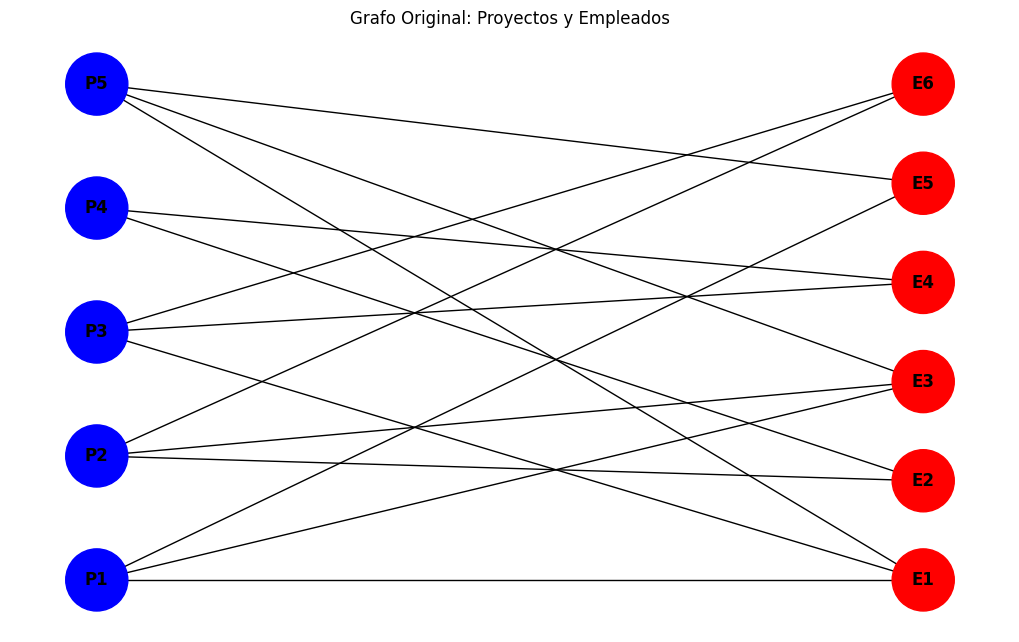

Asignaciones encontradas:

Proyecto 1 -> Empleado 5
Proyecto 2 -> Empleado 2
Proyecto 3 -> Empleado 1
Proyecto 4 -> Empleado 4
Proyecto 5 -> Empleado 3


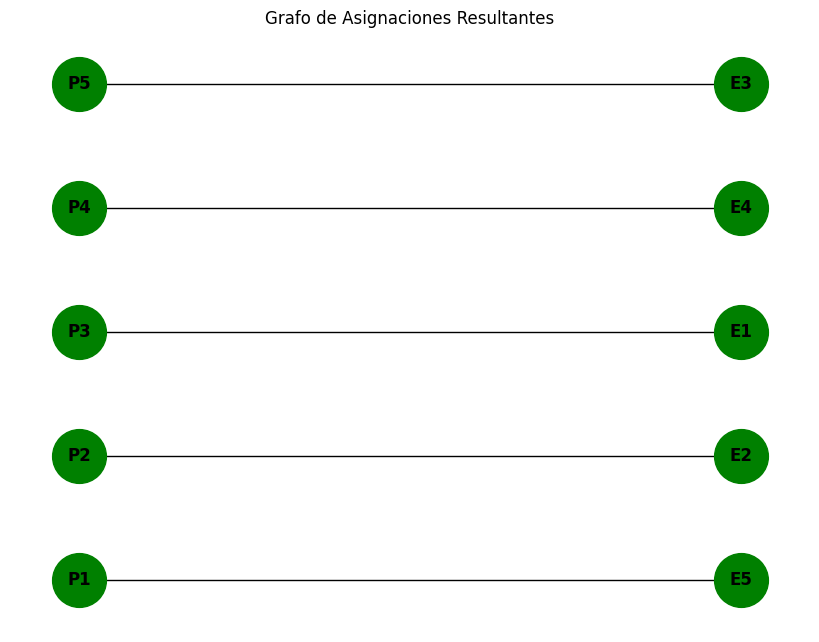

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

#Creé un un grafo bipartito utilizando la librería NetworkX.
#En este grafo, los nodos representan empleados y proyectos,
#y las aristas representan compatibilidad en habilidades.
#Para encontrar la asignación óptima de proyectos,
#apliqué el algoritmo maximum_matching,
#este método es eficiente, con una complejidad de O(√n * m).

def leer_habilidades(nombre_archivo):
    with open(nombre_archivo, 'r') as archivo:
        lineas = archivo.readlines()
    matriz = [list(map(int, linea.strip().split(','))) for linea in lineas]
    return matriz

def construir_grafo(matriz):
    G = nx.Graph()
    empleados = [f'E{i+1}' for i in range(len(matriz))]
    proyectos = [f'P{j+1}' for j in range(len(matriz[0]))]

    for i, fila in enumerate(matriz):
        for j, valor in enumerate(fila):
            if valor == 1:
                G.add_edge(proyectos[j], empleados[i])

    return G, proyectos, empleados

def dibujar_grafo_bi(G, proyectos, empleados):
    pos = nx.bipartite_layout(G, nodes=proyectos)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color=["blue" if n in proyectos else "red" for n in G.nodes()],
            node_size=2000, font_weight='bold', edge_color='black')
    plt.title("Grafo Original: Proyectos y Empleados")
    plt.show()

def dibujar_grafo_resultante(asignaciones):
    G_res = nx.Graph()

    for proyecto, empleado in asignaciones.items():
        G_res.add_edge(proyecto, empleado)

    pos = nx.bipartite_layout(G_res, nodes=[n for n in G_res if n.startswith('P')])
    plt.figure(figsize=(8,6))
    nx.draw(G_res, pos, with_labels=True, node_size=1500, node_color='green', font_weight='bold', edge_color='black')
    plt.title("Grafo de Asignaciones Resultantes")
    plt.show()

def asignar_proyectos(G, proyectos):
    matching = nx.bipartite.maximum_matching(G, top_nodes=proyectos)
    asignaciones = {proy: matching[proy] for proy in proyectos if proy in matching}

    if len(asignaciones) < len(proyectos):
        print("No se pudo encontrar una solucion valida.")
        return

    print("Asignaciones encontradas:\n")
    for p, e in asignaciones.items():
        print(f"{p.replace('P', 'Proyecto ')} -> {e.replace('E', 'Empleado ')}")

    dibujar_grafo_resultante(asignaciones)

def main():
    matriz = leer_habilidades('habilidades.txt')
    G, proyectos, empleados = construir_grafo(matriz)
    dibujar_grafo_bi(G, proyectos, empleados)
    asignar_proyectos(G, proyectos)

if __name__ == '__main__':
    main()